# Model Evaluation

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
np.random.RandomState(42)

In [2]:
X = pd.read_csv('../Data/X.csv',index_col=[0])
y = pd.read_csv('../Data/y.csv',index_col=[0])
test = pd.read_csv('../Data/formatted_test.csv',index_col=[0])
with open('../Assets/LogReg.pkl','rb') as f:
    LogReg = pickle.load(f)
with open('../Assets/Gradboost.pkl','rb') as f:
    Gradboost = pickle.load(f)
with open('../Assets/RandFor.pkl','rb') as f:
    RandFor = pickle.load(f)
with open('../Assets/AdaBoost.pkl','rb') as f:
    Adaboost = pickle.load(f)
with open('../Assets/ID_list.pkl','rb') as f:
    ID_list = pickle.load(f)

### Train Test Split

> This train test split mimics the train test split that was used for training each model. What this means is that the X_train, X_test, y_train, y_test are the exact same as the ones used to create each model.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

> Looking at the roc_auc score for each model, we can see that many of our models suffered from overfitting. This can be common in instances where the classes are very unbalanced. For the kaggle competition, Logistic Regression will be the best choice, because the differences in roc_auc scores is the smallest. Because the kaggle competition is graded on roc_auc score, we want a model that will be able to generalize based on this metric. However, this is not the best metric for a production model, as we want to minimize type 2 errors, or false negatives.

In [4]:
model_dict = {LogReg:'Logistic Regression',Gradboost:'Gradient Boosting',Adaboost:'Adaptive Boosting',RandFor:'Random Forest'}
for model in model_dict:
    print('For '+model_dict[model], 'the roc auc score for the training data is:',round(model.score(X_train,y_train),3))
    print('For '+model_dict[model], 'the roc auc score for the testing data is:',round(model.score(X_test,y_test),3),'\n')

For Logistic Regression the roc auc score for the training data is: 0.797
For Logistic Regression the roc auc score for the testing data is: 0.787 

For Gradient Boosting the roc auc score for the training data is: 0.885
For Gradient Boosting the roc auc score for the testing data is: 0.876 

For Adaptive Boosting the roc auc score for the training data is: 0.996
For Adaptive Boosting the roc auc score for the testing data is: 0.801 

For Random Forest the roc auc score for the training data is: 0.945
For Random Forest the roc auc score for the testing data is: 0.872 



> This cell saves a csv file to submit the probability of West Nile virus being present. The link to submit is https://www.kaggle.com/c/predict-west-nile-virus/leaderboard, and the csv file that would be submitted to kaggle is named 'to_kaggle.'

In [5]:
pd.DataFrame(LogReg.predict_proba(test)[:,1],index=ID_list,columns=['WnvPresent']).to_csv('../Data/to_kaggle.csv')

> This function provides us with several important metrics besides the roc_auc score. These metrics include:
>> Accuracy: What percentage of prediction were correct
    
>> Recall: What percentage of cases where West Nile virus is present were predicted correctly
    
>> Precision: Of all the cases where we predict there will be West Nile virus, how many were correct
    
>>Confusion Matrix: This Data Frame shows us how our model performed by each case. The columns indicate how our model predicted for either the presence of lack of West Nile virus, and our rows indicate the actual presence of West Nile Virus

In [6]:
def Confusion_matrix_df(model,X = X,y = y):
    df = pd.DataFrame(confusion_matrix(y['WnvPresent'],model.predict(X)),
    index=['No West Nile Present','West Nile Present'],
    columns=['Predicted No West Nile Present','Predicted West Nile Present'])
    
    print("The model's Accuracy rate is",round(accuracy_score(y['WnvPresent'],model.predict(X))*100,2),'%')
    print("The model's Recall is",round(recall_score(y['WnvPresent'],model.predict(X))*100,2),'%')
    print("The model's Precision is",round(precision_score(y['WnvPresent'],model.predict(X))*100,2),'%')
    return df

In [7]:
Confusion_matrix_df(LogReg,X = X_test,y = y_test)

The model's Accuracy rate is 68.21 %
The model's Recall is 75.76 %
The model's Precision is 11.5 %


,Predicted No West Nile Present,Predicted West Nile Present
No West Nile Present,2025,962
West Nile Present,40,125


In [8]:
Confusion_matrix_df(Gradboost,X = X_test,y = y_test)

The model's Accuracy rate is 94.64 %
The model's Recall is 0.61 %
The model's Precision is 16.67 %


,Predicted No West Nile Present,Predicted West Nile Present
No West Nile Present,2982,5
West Nile Present,164,1


In [9]:
Confusion_matrix_df(RandFor,X = X_test,y =y_test)

The model's Accuracy rate is 85.18 %
The model's Recall is 69.09 %
The model's Precision is 21.51 %


,Predicted No West Nile Present,Predicted West Nile Present
No West Nile Present,2571,416
West Nile Present,51,114


In [10]:
Confusion_matrix_df(Adaboost,X = X_test,y =y_test)

The model's Accuracy rate is 90.04 %
The model's Recall is 29.7 %
The model's Precision is 19.84 %


,Predicted No West Nile Present,Predicted West Nile Present
No West Nile Present,2789,198
West Nile Present,116,49


> After looking at the metrics for each of our models, the model that would be best for predicting West Nile virus would be the Random Forest Model. The metrics that are the most important for this particular data science problem would be recall and precision. Even though Logistic Regression had a higher recall rate that Random Forest, it predicted far more cases of West Nile incorrectly, more than double, than Random Forest did. For these reason, I believe that Random Forrest is our best performing model for this specific problem.

In [11]:
feature_importance = pd.DataFrame(RandFor.best_estimator_.named_steps['rf'].feature_importances_,index = X_train.columns,columns=['Importance'])
top_10 = feature_importance.sort_values(by='Importance',ascending=False).head(10)

> For each feature, the classifier produces a statistical measurement for how important the feature was for predicting the target variable by looking at how much the tree nodes, which use that feature, reduce impurity across all trees in the forest. It computes this score automatically for each feature after training, and scales the results so that the sum of all importance is equal to 1. 0.0972 means almost 9% of the samples is correctly classified by this feature. Looking at the feature importances can give you a sense of which of your variables have the most effect in these models. Through looking at the feature importance, you can decide which features you may want to drop, because they don’t contribute enough or nothing to the prediction process. This is important, because a general rule in machine learning is that the more features you have, the more likely your model will suffer from overfitting and vice versa. The graph below shows us the top 10 features for our Random Forest model.

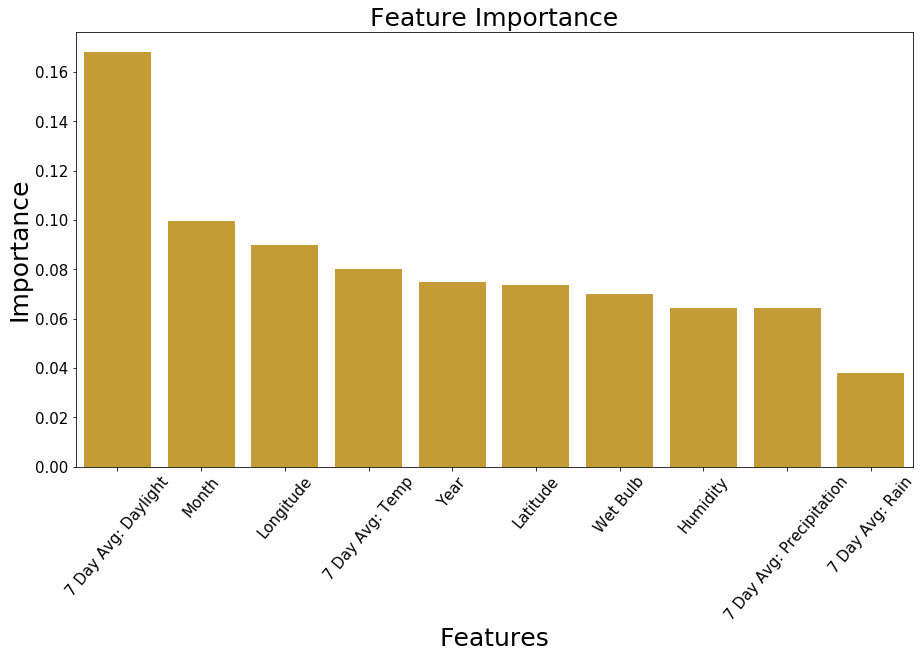

In [14]:
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = top_10["Importance"],x = top_10.index,ax=ax,color='goldenrod')
ax.set_title("Feature Importance", fontsize=25)
ax.set_ylabel('Importance', fontsize=25)
ax.set_xlabel('Features', fontsize=25)
ax.set_xticklabels(['7 Day Avg: Daylight', 'Month', 'Longitude', '7 Day Avg: Temp', 'Year', 'Latitude', 'Wet Bulb', 'Humidity', 
                    '7 Day Avg: Precipitation', '7 Day Avg: Rain'], fontsize= 15, rotation=50)
ax.tick_params(axis= 'y', labelsize=15)
plt.savefig('../Images/Feature_Importance')

# Moving Forward

> This project was particularly interesting due to the time nature of the training and testing data. It was particularly interesting in terms of optimizing for a metric that is not accuracy, and dealing with very unbalanced classes. Moving forward it would be interesting to have full access to the testing data to see if we would be able to predict the presence of West Nile virus for years after 2015.